# Kernel: how long till the gold medal?

**The script helps to identify the number of upvotes counted for a medal.**

**You can check your own or anybody else kernels.**

Not every upvote of your kernel counts towards medals: 

> self-votes and votes by novices are excluded from medal calculation. 

\* votes on old posts are also excluded from the medal calculation, but the script doesn't do this check.

\** there probably a 1 day lag in the amount of upvotes you see since the database is updated by kaggle not every hour

\*** Before running the script insure that add "Meta Kaggle" dataset via Add dataset->Datasets->Search for "Meta Kaggle" (Every time Kaggle updates the database, it deletes the previous one and it is no longer available).

# Basic setup

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import os
#print(os.listdir("../input"))

Users = pd.read_csv('../input/Users.csv').rename(columns = {'Id': 'UsersId'})
Kernels = pd.read_csv('../input/Kernels.csv').rename(columns = {'Id': 'KernelsId'})
KernelVersions = pd.read_csv('../input/KernelVersions.csv').rename(columns = {'Id': 'KernelVersionsId'})
KernelVotes = pd.read_csv('../input/KernelVotes.csv').rename(columns = {'Id': 'KernelVotesId'})

# Kernels to evaluate

My kernels to evaluate:

* [Clustering blender: https://www.kaggle.com/darbin/clustering-blender-of-0-901-solutions](https://www.kaggle.com/darbin/clustering-blender-of-0-901-solutions)
* [PCA blender: https://www.kaggle.com/darbin/pca-blender-of-0-901-solutions](https://www.kaggle.com/darbin/pca-blender-of-0-901-solutions)
* [Weighted naive benchmark: https://www.kaggle.com/darbin/weighted-naive-benchmark-lb-2-081](https://www.kaggle.com/darbin/weighted-naive-benchmark-lb-2-081)
* [Count "not novices" upvotes: https://www.kaggle.com/darbin/count-not-novices-kernels-upvotes-to-get-medal](https://www.kaggle.com/darbin/count-not-novices-kernels-upvotes-to-get-medal)
* [Discussion upvotes: how long till the medal?: https://www.kaggle.com/darbin/discussion-upvotes-how-long-till-the-medal](https://www.kaggle.com/darbin/discussion-upvotes-how-long-till-the-medal)
* [Logit for 200 PCA features: https://www.kaggle.com/darbin/logit-for-200-pca-features](https://www.kaggle.com/darbin/logit-for-200-pca-features)
* [Random solution (AUC = 0.5): https://www.kaggle.com/darbin/random-solution-auc-0-5](https://www.kaggle.com/darbin/random-solution-auc-0-5)
* [Naive benchmark (extended explanation): https://www.kaggle.com/darbin/naive-benchmark-extended-explanation](https://www.kaggle.com/darbin/naive-benchmark-extended-explanation)
* [XGBoost tuned with pipelines: https://www.kaggle.com/darbin/xgboost-tuned-with-pipelines](https://www.kaggle.com/darbin/xgboost-tuned-with-pipelines)
* [CV on pipelines for XGBoost: https://www.kaggle.com/darbin/cross-validation-on-pipelines-for-xgboost](https://www.kaggle.com/darbin/cross-validation-on-pipelines-for-xgboost)

In [2]:
# put your kernel slugs here (it is a final part of a kernel url)
my_kernels_list = ['clustering-blender-of-0-901-solutions', 
                   'pca-blender-of-0-901-solutions', 
                   'weighted-naive-benchmark-lb-2-081',
                   'count-not-novices-kernels-upvotes-to-get-medal',
                   'discussion-upvotes-how-long-till-the-medal',
                   'logit-for-200-pca-features',
                   'random-solution-auc-0-5', 
                   'naive-benchmark-extended-explanation',
                   'xgboost-tuned-with-pipelines', 
                   'cross-validation-on-pipelines-for-xgboost']

# error checking
# if you created kernel 1 day ago it still can take time (1-2 days) to appear in the Kaggle open source database 
# so if the kernel is absent in the database or it is misspelled then script will through an error
error_counter = 0
for i, kernel in enumerate(my_kernels_list):
    if(len(Kernels[Kernels.CurrentUrlSlug == kernel]['KernelsId']) == 0):
        error_counter += 1
        print("Error in the", i, "kernel slug: ", kernel, 
              "\n\rCheck the correctness of the slug\n\ror probably it is not added to the Kaggle open source database yet. Try to check it tomorrow.\n\r")

if(error_counter == 0): print("Ok")

Ok


# Count "not novices" upvotes

In [3]:
# 'CountedUpvotes' is the target - this is the number of users who are not Novices and who didn't upwote his own kernel

# result table
kernel_upvotes = pd.DataFrame(
    columns = ['Kernel', 
               'CountedUpvotes', # novices and own upvotes are excluded
               'TotalUpvotes', # total upvotes
               'RemainedUpvotes_Bronze', # = 5 - CountedUpvotes
               'RemainedUpvotes_Silver', # = 20 - CountedUpvotes
               'RemainedUpvotes_Gold' # = 50 - CountedUpvotes
                ])

for i, kernel in enumerate(my_kernels_list):
    print(i, kernel)
    my_current_kernel_slug = my_kernels_list[i]
    my_user_id = float(Kernels[Kernels.CurrentUrlSlug == my_current_kernel_slug]['AuthorUserId'])
    my_kernel_id = float(Kernels[Kernels.CurrentUrlSlug == my_current_kernel_slug]['KernelsId'])
    my_kernel_versions_id = KernelVersions[KernelVersions.KernelId == my_kernel_id]['KernelVersionsId']
    users_id_upvoted_my_kernel = KernelVotes[KernelVotes.KernelVersionId.isin(my_kernel_versions_id)]['UserId']
    
    total_upvotes_count = Users[Users.UsersId.isin(users_id_upvoted_my_kernel)]['UsersId'].count()
    
    # upvotes which are counted for a medal
    counted_upvotes_count = Users[Users.UsersId.isin(users_id_upvoted_my_kernel) 
                                 & (Users.PerformanceTier > 0) 
                                 & (Users.UsersId != my_user_id)]['UsersId'].count()

    # results
    kernel_upvotes.loc[ i, 'Kernel'] = my_current_kernel_slug
    kernel_upvotes.loc[ i, 'CountedUpvotes'] = counted_upvotes_count
    kernel_upvotes.loc[ i, 'TotalUpvotes'] = total_upvotes_count
    kernel_upvotes.loc[ i, 'RemainedUpvotes_Bronze'] = 5 - counted_upvotes_count if counted_upvotes_count < 5 else 0
    kernel_upvotes.loc[ i, 'RemainedUpvotes_Silver'] = 20 - counted_upvotes_count if counted_upvotes_count < 20 else 0
    kernel_upvotes.loc[ i, 'RemainedUpvotes_Gold'] = 50 - counted_upvotes_count if counted_upvotes_count < 50 else 0
    
kernel_upvotes

0 clustering-blender-of-0-901-solutions
1 pca-blender-of-0-901-solutions
2 weighted-naive-benchmark-lb-2-081
3 count-not-novices-kernels-upvotes-to-get-medal
4 discussion-upvotes-how-long-till-the-medal
5 logit-for-200-pca-features
6 random-solution-auc-0-5
7 naive-benchmark-extended-explanation
8 xgboost-tuned-with-pipelines
9 cross-validation-on-pipelines-for-xgboost


,Kernel,CountedUpvotes,TotalUpvotes,RemainedUpvotes_Bronze,RemainedUpvotes_Silver,RemainedUpvotes_Gold
0,clustering-blender-of-0-901-solutions,49,60,0,0,1
1,pca-blender-of-0-901-solutions,25,27,0,0,25
2,weighted-naive-benchmark-lb-2-081,18,22,0,2,32
3,count-not-novices-kernels-upvotes-to-get-medal,9,11,0,11,41
4,discussion-upvotes-how-long-till-the-medal,5,6,0,15,45
5,logit-for-200-pca-features,3,4,2,17,47
6,random-solution-auc-0-5,3,5,2,17,47
7,naive-benchmark-extended-explanation,2,5,3,18,48
8,xgboost-tuned-with-pipelines,2,4,3,18,48
9,cross-validation-on-pipelines-for-xgboost,1,2,4,19,49


# Visualization

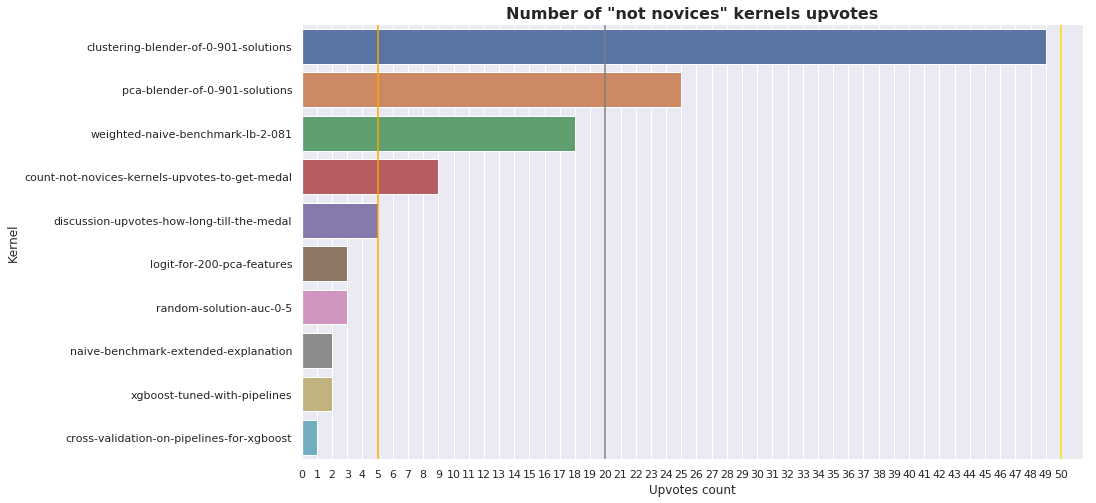

In [4]:
plt.figure(figsize = (14, 8))

sns.barplot(x = 'CountedUpvotes', 
            y = 'Kernel', 
            data = kernel_upvotes.sort_values(by = ['CountedUpvotes'], ascending = False))

# bronze medal zone
plt.axvline(x = 5, color = 'orange')
# silver medal zone
plt.axvline(x = 20, color = 'grey')
# gold medal zone
plt.axvline(x = 50, color = 'gold')

plt.title('Number of "not novices" kernels upvotes', 
          {'fontsize':'16', 
           'fontweight':'bold'})

if(max(kernel_upvotes.CountedUpvotes) > 50):
    max_tick = max(kernel_upvotes.CountedUpvotes)+1
else:
    max_tick = 50+1
    
plt.xticks(np.arange(0, max_tick, 1.0))
plt.ylabel('Kernel')
plt.xlabel('Upvotes count')
plt.show()